In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/train_processsed.csv')
df.head(5)

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNaN,MasVnrAreaNaN,GarageYrBltNaN
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,...,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,...,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,...,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,...,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,...,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [ ]:
y = df['SalePrice']
x = df.drop(['Id','SalePrice'],axis=1)

In [3]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x1 = xgb.XGBRegressor()

In [ ]:
x1.fit(x_train,y_train)

[04:45:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = x1.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

0.13205370062118182

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9065545732620287


In [ ]:
y_pred_train = x1.predict(x_train)

In [ ]:
np.sqrt(mean_squared_error(y_train,y_pred_train))

0.08322456557263122

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


[17:56:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9065545732620287

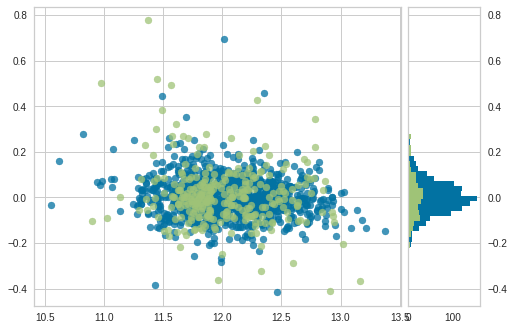

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(x1)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)


XGboost with hyperparameter tuning

In [ ]:
#XGboost with hyperparameter tuning
y = df['SalePrice']
x = df.drop(['Id','SalePrice'],axis=1)

In [ ]:
regressor = xgb.XGBRegressor()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
params = {'n_estimators':[100,500,900,1100,1500],
          'max_depth':[2,3,5,10,15],
          'booster':['gbtree','gblinear'],
          'learning_rate':[0.05,0.1,0.15,0.20],
          'min_child_weight':[1,2,3,4],
          'gamma':[0.1,0.2,0.3,0.4,0.5]
          
          }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,param_distributions=params,
                               cv=10,n_iter=50,
                               scoring='neg_mean_absolute_error',n_jobs=4,
                               verbose=5,
                               return_train_score=True,
                               random_state=42)

In [ ]:
#random_cv.fit(x_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    6.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   52.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed: 11.5min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 17.0min
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed: 21.1min finished


[05:22:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'gamma': [0.1, 

In [ ]:
#random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=4, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
regressor = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.2,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=4, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
regressor.fit(x_train,y_train)

[09:18:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.2,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=4, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
ypred = regressor.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,ypred))

0.14165493991910133

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, ypred))

0.892472302157507


In [ ]:
y_pred_train = regressor.predict(x_train)

In [ ]:
np.sqrt(mean_squared_error(y_train,y_pred_train))

0.10059751511067853

In [ ]:
print(r2_score(y_train,y_pred_train))

0.992089279393517


[07:10:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9105955663204655

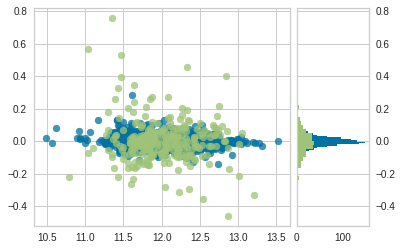

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regressor)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)

In [ ]:
ypred_norm = np.expm1(regressor.predict(x_test))

In [ ]:
ytest_norm = np.expm1(y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ytest_norm,ypred_norm))

28361.015840919175

In [ ]:
(ypred_norm - ytest_norm).abs().describe()

count       292.000000
mean      15271.394424
std       23939.389797
min          16.968750
25%        3603.183594
50%        8802.390625
75%       18708.937500
max      224922.093750
Name: SalePrice, dtype: float64

In [ ]:
importances = regressor.feature_importances_

In [ ]:
indices = np.argsort(importances)[::-1]

In [ ]:
names = [x_train.columns[i] for i in indices]

([<matplotlib.axis.XTick at 0x7f59f465b940>,
 [Text(0, 0, 'GarageCars'),
  Text(0, 0, 'KitchenQual'),
  Text(0, 0, 'FireplaceQu'),
  Text(0, 0, 'GarageCond'),
  Text(0, 0, 'GarageType'),
  Text(0, 0, 'GarageFinish'),
  Text(0, 0, 'OverallQual'),
  Text(0, 0, 'GrLivArea'),
  Text(0, 0, 'Neighborhood'),
  Text(0, 0, 'TotalBsmtSF')])

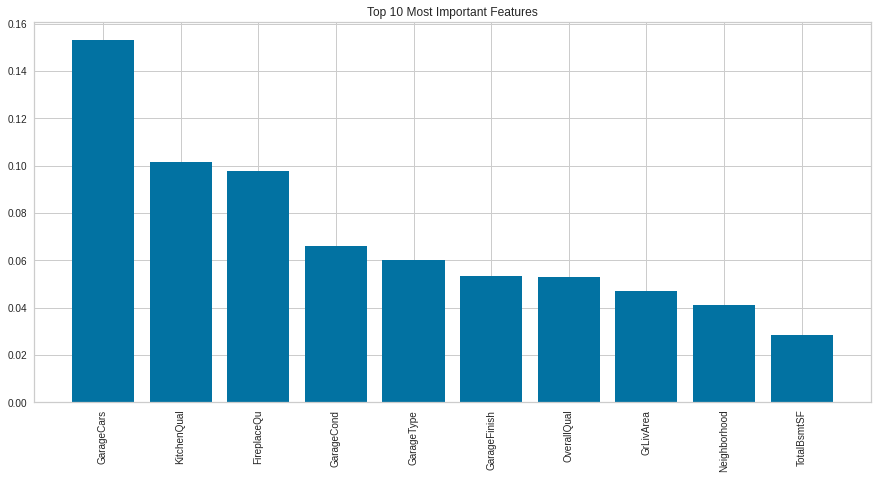

In [ ]:
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Top 10 Most Important Features") # Create plot title
plt.bar(range(10), importances[indices][:10]) # Add bars
plt.xticks(range(10), names[:10], rotation=90)

XGBoost with top 10 features

In [4]:
#Xgboost with important most important features
y = df['SalePrice']
x = df[['GarageCars','KitchenQual','FireplaceQu','GarageCond','GarageType','GarageFinish','OverallQual','GrLivArea','Neighborhood','TotalBsmtSF']]

In [5]:
xg_reg = xgb.XGBRegressor()

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
params = {'n_estimators':[100,500,900,1100,1500],
          'max_depth':[2,3,5,10,15],
          'booster':['gbtree','gblinear'],
          'learning_rate':[0.05,0.1,0.15,0.20],
          'min_child_weight':[1,2,3,4],
          
          }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=xg_reg,param_distributions=params,
                               cv=5,n_iter=50,
                               scoring='neg_mean_absolute_error',n_jobs=4,
                               verbose=5,
                               return_train_score=True,
                               random_state=42)

In [ ]:
#random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   18.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   41.7s


[12:06:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                          verbosity=1),
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'booster': ['gbtree', 'gblinear'],

In [ ]:
#random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [7]:
xg_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [8]:
xg_reg.fit(x_train,y_train)

[08:29:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [9]:
y_pred = xg_reg.predict(x_test)

In [10]:
#test rmse
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

0.14978430086383865

In [11]:
y_pred_train = xg_reg.predict(x_train)

In [12]:
#train rmse
np.sqrt(mean_squared_error(y_train,y_pred_train))

0.12731749318261967

In [13]:
ypred_norm = np.expm1(xg_reg.predict(x_test))
ytest_norm = np.expm1(y_test)

In [14]:
#test rmse
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ytest_norm,ypred_norm))

29272.427809298504

In [15]:
ytrain_norm = np.expm1(y_train)
ypred_train_norm = np.expm1(xg_reg.predict(x_train))

In [16]:
#train rmse
np.sqrt(mean_squared_error(ytrain_norm,ypred_train_norm))

24298.58697273181

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


[08:29:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8797764653069444

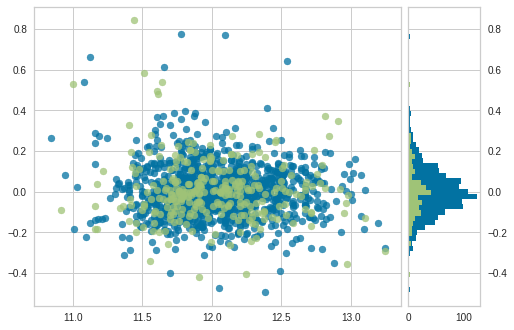

In [17]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(xg_reg)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
#there is good scatter of data which tells the model is good fit

(0.0, 400000.0)

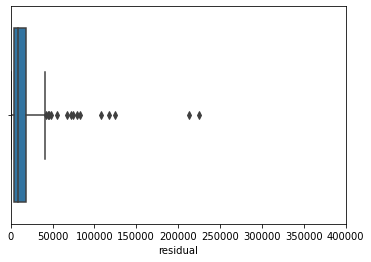

In [ ]:
sns.boxplot(x=(ypred_norm - ytest_norm).abs(),data=df)
plt.xlabel("residual")
plt.xlim(0,400000)
#damn close to zero so it's a good result